In [1]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from meteostat import Point, Daily, units

In [2]:
# Set time period
N = 50
end = datetime.now()
start = datetime(end.year - N, end.month, end.day)

# Create Point for NYC
nyc = Point(40.7789, -73.9692, 3.0)

# fetch data series
data = Daily(nyc, start, end)
data = data.convert(units.imperial)
data = data.fetch()

In [3]:
data["year"], data["month"], data["day"] = (
    data.index.year,
    data.index.month,
    data.index.day,
)

In [4]:
daily_max_avg = pd.DataFrame(data.tmax.groupby(by=[data.month, data.day]).mean())
daily_max_max = pd.DataFrame(data.tmax.groupby(by=[data.month, data.day]).max())

In [5]:
daily_max_avg["time"] = daily_max_avg.index.values
daily_max_avg


tmax      time
month day                  
1     1    42.192    (1, 1)
      2    42.070    (1, 2)
      3    39.540    (1, 3)
      4    40.558    (1, 4)
      5    39.652    (1, 5)
...           ...       ...
12    27   40.182  (12, 27)
      28   43.282  (12, 28)
      29   42.760  (12, 29)
      30   41.100  (12, 30)
      31   41.730  (12, 31)

[366 rows x 2 columns]

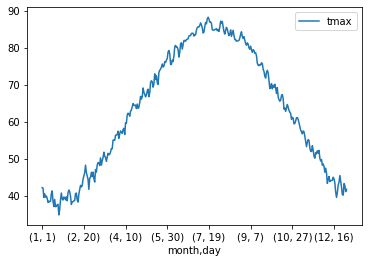

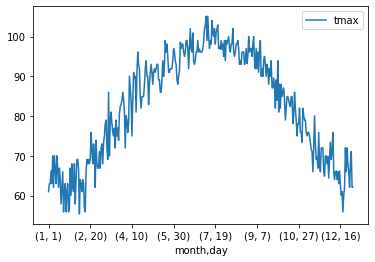

In [6]:
daily_max_avg.plot()
daily_max_max.plot()
plt.show()

In [7]:
# check if today hotter than average
today = end.strftime("%Y-%m-%d")
Month, Day = end.month, end.day

todays_high = data.tmax.loc[today]
todays_avg_high = daily_max_avg.tmax.loc[(Month, Day)]
todays_max_high = daily_max_max.tmax.loc[(Month, Day)]


In [8]:
if todays_high > todays_avg_high:
    print(
        f"The high today in New York is {todays_high:.1f}°F, {todays_high - todays_avg_high:.1f}°F hotter than today's {N}-year average."
    )
else:
    print(
        f"The high today in New York is {todays_high:.1f}°F, {todays_high - todays_avg_high:.1f}°F cooler than today's {N}-year average."
    )
print(f"The {N}-year historical high for today is {todays_max_high:.1f}°F")

The high today in New York is 84.9°F, 6.6°F hotter than today's 50-year average.
The 50-year historical high for today is 93.0°F


In [9]:
# # scatter plot of today's temps
pd.options.mode.chained_assignment = None
daily_hist_series = data[(data["month"] == Month) & (data["day"] == Day)]
daily_hist_series['most_recent'] = np.where(daily_hist_series['year'] == daily_hist_series['year'].max(), 1, 0)


In [10]:
daily_hist_series

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,year,month,day,most_recent
time,,,,,,,,,,,,,,
1973-06-02,69.1,64.0,78.1,0.000,0.0,NaN,8.4,NaN,1016.9,NaN,1973,6,2,0
1974-06-02,62.1,59.0,68.0,0.260,0.0,26.0,8.0,NaN,1017.9,NaN,1974,6,2,0
1975-06-02,71.6,62.1,80.1,0.000,0.0,293.0,8.5,20.8,1015.5,NaN,1975,6,2,0
1976-06-02,58.3,53.1,66.9,0.012,0.0,60.0,10.9,23.1,1017.3,NaN,1976,6,2,0
1977-06-02,NaN,63.0,86.0,0.000,0.0,NaN,NaN,21.9,NaN,NaN,1977,6,2,0
1978-06-02,NaN,66.9,84.0,0.000,0.0,NaN,NaN,17.2,NaN,NaN,1978,6,2,0
1979-06-02,NaN,61.0,69.1,0.000,0.0,NaN,NaN,16.1,NaN,NaN,1979,6,2,0
1980-06-02,76.6,71.1,84.9,0.012,0.0,NaN,9.9,26.4,1010.3,NaN,1980,6,2,0
1981-06-02,63.9,61.0,68.0,0.661,0.0,101.0,8.0,13.9,1020.5,NaN,1981,6,2,0


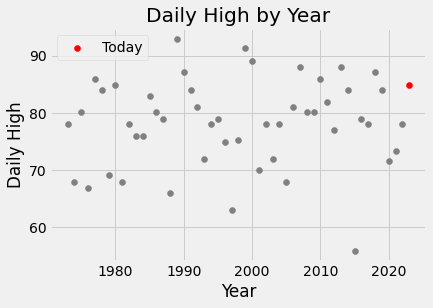

In [17]:
plt.style.use('fivethirtyeight')
plt.scatter(daily_hist_series["year"][daily_hist_series['most_recent'] == 0], daily_hist_series["tmax"][daily_hist_series['most_recent'] == 0], color='gray')
plt.scatter(daily_hist_series["year"][daily_hist_series['most_recent'] == 1], daily_hist_series["tmax"][daily_hist_series['most_recent'] == 1], color='red', label='Today')
plt.xlabel('Year')
plt.ylabel('Daily High')
plt.title('Daily High by Year')
plt.legend(loc='upper left')
plt.show()